# 전체적으로 사용되는 함수 및 변수 정의하기

In [1]:
hifi_dir = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/hifi'
grayscaled_lofi_dir = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/grayscaled_lofi'
styled_lofi_dir = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/styled_lofi'
sketch_image_dir = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/sketch_image'
grayscaled_model_gen_weight_file = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/grayscaled_model_gen.pt'
grayscaled_model_dis_weight_file = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/grayscaled_model_dis.pt'
styled_model_gen_weight_file = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/styled_model_gen.pt'
styled_model_dis_weight_file = '/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi/MyData/styled_model_dis.pt'

# 자료 저장할 폴더 만들기
def create_dir(name):
    if not os.path.isdir(name):
        os.makedirs(name)

# 웹 크롤링 및 데이터 저장하기
---
- https://pgh268400.tistory.com/286
- https://velog.io/@jungeun-dev/Python-%EC%9B%B9-%ED%81%AC%EB%A1%A4%EB%A7%81Selenium-%EA%B5%AC%EA%B8%80-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%88%98%EC%A7%91
- https://blog.naver.com/PostView.nhn?blogId=jinyuri303&logNo=222268855640&categoryNo=39&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
- https://swlock.blogspot.com/2021/10/python-count-files.html
- https://www.delftstack.com/ko/howto/python/convert-image-to-grayscale-python/

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import time
import os
import requests
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

In [3]:
# 특정 키워드로 검색한 구글 이미지들을 저장
def get_images_from_web(keyword, dir_name):

    #Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver', options=options)
    
    # 구글 이미지 검색창으로 이동
    url = "https://www.google.co.kr/imghp?hl=ko" 
    driver.get(url)

    # 해당 키워드 검색하기
    search_box = driver.find_element(By.NAME, 'q')
    search_box.send_keys(keyword)
    search_box.send_keys(Keys.ENTER)

    # 처음에는 일부 이미지만 보여지기 때문에, 스크롤을 내려서 더 불러오기
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
            except:
                break
        last_height = new_height

    # 폴더 만들고 이미지 저장하기
    create_dir(dir_name)
    imgs = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
    actions = ActionChains(driver)

    count = 1
    for i, img in enumerate(imgs):
        print("\r" + str(i+1) + "/" + str(len(imgs)), end='  ')
        try:
            actions.move_to_element(img).click().perform()
            time.sleep(2)
            img_url = driver.find_element(By.CSS_SELECTOR, ".n3VNCb.KAlRDb").get_attribute('src')
            file_path = dir_name + '/img' + str(count) + '.jpg'
            req = requests.get(img_url)
            with open(file_path, 'wb') as outfile:
                outfile.write(req.content)
            count += 1
        except:
            print('fail')
            pass

    driver.close()

In [4]:
# 라벨로 사용할 앱 디자인 관련 이미지 크롤링하기
get_images_from_web(keyword='app design', dir_name=hifi_dir)
# 스타일을 추출할 스케치 관련 이미지 크롤링하기
get_images_from_web(keyword='sketch', dir_name=sketch_image_dir)

8/395  fail
25/395  fail
39/395  fail
50/395  fail
55/395  fail
70/395  fail
93/395  fail
120/395  fail
123/395  fail
147/395  fail
149/395  fail
157/395  fail
158/395  fail
171/395  fail
190/395  fail
204/395  fail
206/395  fail
222/395  fail
226/395  fail
280/395  fail
284/395  fail
323/395  fail
395/395  

In [ ]:
# 앱 디자인 이미지를 흑백으로 바꿔서 저장하기
create_dir(grayscaled_lofi_dir)
files = os.listdir(hifi_dir)
files_cnt = len(files)
for i, filename in enumerate(files):
    print("\r" + str(i+1) + "/" + str(files_cnt), end='  ')
    try:
        img = Image.open(hifi_dir+'/'+filename)
        file_path = grayscaled_lofi_dir + '/img' + filename[3:]
        img.convert('L').save(file_path)
    except:
        print('fail')
        pass

# 데이터 준비하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [5]:
import os
import time
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# Costum dataset 생성
class FacadeDataset(Dataset):
    def __init__(self, lofi_dir, transform=False):
        super().__init__()
        self.lofi_dir = lofi_dir
        self.img_filenames = [x for x in os.listdir(self.lofi_dir)]
        self.transform = transform

    def __getitem__(self, index):
        a = Image.open(hifi_dir+'/'+self.img_filenames[index]).convert('RGB')
        b = Image.open(self.lofi_dir+'/'+self.img_filenames[index]).convert('RGB')
        
        if self.transform:
            a = self.transform(a)
            b = self.transform(b)

        return b,a

    def __len__(self):
        return len(self.img_filenames)

In [ ]:
# transforms 정의
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),
                    transforms.Resize((256,256))
])

train_ds_grayscaled = FacadeDataset(grayscaled_lofi_dir, transform=transform)
train_ds_styled = FacadeDataset(styled_lofi_dir, transform=transform)

# 데이터 로더 생성하기
train_dl_grayscaled = DataLoader(train_ds_grayscaled, batch_size=32, shuffle=True)
train_dl_styled = DataLoader(train_ds_styled, batch_size=32, shuffle=True)

In [ ]:
# 샘플 이미지 확인하기
plt.figure(figsize=(10,10))

a,b = train_ds_grayscaled[0]

plt.subplot(2,2,1)
plt.imshow(to_pil_image(0.5*a+0.5))
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(to_pil_image(0.5*b+0.5))
plt.axis('off')

a, b = train_ds_styled[0]

plt.subplot(2,2,3)
plt.imshow(to_pil_image(0.5*a+0.5))
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(to_pil_image(0.5*b+0.5))
plt.axis('off')

# 모델 구축하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [ ]:
# UNet
class UNetDown(nn.Module):
    def __init__(self, in_channels, out_channels, normalize=True, dropout=0.0):
        super().__init__()

        layers = [nn.Conv2d(in_channels, out_channels, 4, stride=2, padding=1, bias=False)]

        if normalize:
            layers.append(nn.InstanceNorm2d(out_channels)),

        layers.append(nn.LeakyReLU(0.2))

        if dropout:
            layers.append(nn.Dropout(dropout))

        self.down = nn.Sequential(*layers)

    def forward(self, x):
        x = self.down(x)
        return x

# check
x = torch.randn(16, 3, 256,256, device=device)
model = UNetDown(3,64).to(device)
down_out = model(x)
print(down_out.shape)

torch.Size([16, 64, 128, 128])


In [ ]:
class UNetUp(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.0):
        super().__init__()

        layers = [
            nn.ConvTranspose2d(in_channels, out_channels,4,2,1,bias=False),
            nn.InstanceNorm2d(out_channels),
            nn.LeakyReLU()
        ]

        if dropout:
            layers.append(nn.Dropout(dropout))

        self.up = nn.Sequential(*layers)

    def forward(self,x,skip):
        x = self.up(x)
        x = torch.cat((x,skip),1)
        return x

# check
x = torch.randn(16, 128, 64, 64, device=device)
model = UNetUp(128,64).to(device)
out = model(x,down_out)
print(out.shape)

torch.Size([16, 128, 128, 128])


In [ ]:
# generator: 가짜 이미지를 생성합니다.
class GeneratorUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super().__init__()

        self.down1 = UNetDown(in_channels, 64, normalize=False)
        self.down2 = UNetDown(64,128)                 
        self.down3 = UNetDown(128,256)               
        self.down4 = UNetDown(256,512,dropout=0.5) 
        self.down5 = UNetDown(512,512,dropout=0.5)      
        self.down6 = UNetDown(512,512,dropout=0.5)             
        self.down7 = UNetDown(512,512,dropout=0.5)              
        self.down8 = UNetDown(512,512,normalize=False,dropout=0.5)

        self.up1 = UNetUp(512,512,dropout=0.5)
        self.up2 = UNetUp(1024,512,dropout=0.5)
        self.up3 = UNetUp(1024,512,dropout=0.5)
        self.up4 = UNetUp(1024,512,dropout=0.5)
        self.up5 = UNetUp(1024,256)
        self.up6 = UNetUp(512,128)
        self.up7 = UNetUp(256,64)
        self.up8 = nn.Sequential(
            nn.ConvTranspose2d(128,3,4,stride=2,padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)
        d7 = self.down7(d6)
        d8 = self.down8(d7)

        u1 = self.up1(d8,d7)
        u2 = self.up2(u1,d6)
        u3 = self.up3(u2,d5)
        u4 = self.up4(u3,d4)
        u5 = self.up5(u4,d3)
        u6 = self.up6(u5,d2)
        u7 = self.up7(u6,d1)
        u8 = self.up8(u7)

        return u8

# check
x = torch.randn(16,3,256,256,device=device)
model = GeneratorUNet().to(device)
out = model(x)
print(out.shape)

torch.Size([16, 3, 256, 256])


In [ ]:
class Dis_block(nn.Module):
    def __init__(self, in_channels, out_channels, normalize=True):
        super().__init__()

        layers = [nn.Conv2d(in_channels, out_channels, 3, stride=2, padding=1)]
        if normalize:
            layers.append(nn.InstanceNorm2d(out_channels))
        layers.append(nn.LeakyReLU(0.2))
    
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        x = self.block(x)
        return x

# check
x = torch.randn(16,64,128,128,device=device)
model = Dis_block(64,128).to(device)
out = model(x)
print(out.shape)

torch.Size([16, 128, 64, 64])


In [ ]:
# Discriminator은 patch gan을 사용합니다.
# Patch Gan: 이미지를 16x16의 패치로 분할하여 각 패치가 진짜인지 가짜인지 식별합니다.
# high-frequency에서 정확도가 향상됩니다.

class Discriminator(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()

        self.stage_1 = Dis_block(in_channels*2,64,normalize=False)
        self.stage_2 = Dis_block(64,128)
        self.stage_3 = Dis_block(128,256)
        self.stage_4 = Dis_block(256,512)

        self.patch = nn.Conv2d(512,1,3,padding=1) # 16x16 패치 생성

    def forward(self,a,b):
        x = torch.cat((a,b),1)
        x = self.stage_1(x)
        x = self.stage_2(x)
        x = self.stage_3(x)
        x = self.stage_4(x)
        x = self.patch(x)
        x = torch.sigmoid(x)
        return x
# check
x = torch.randn(16,3,256,256,device=device)
model = Discriminator().to(device)
out = model(x,x)
print(out.shape)

torch.Size([16, 1, 16, 16])


In [ ]:
model_gen = GeneratorUNet().to(device)
model_dis = Discriminator().to(device)

# 가중치 초기화
def initialize_weights(model):
    class_name = model.__class__.__name__
    if class_name.find('Conv') != -1:
        nn.init.normal_(model.weight.data, 0.0, 0.02)


# 가중치 초기화 적용
model_gen.apply(initialize_weights);
model_dis.apply(initialize_weights);

# 학습하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [ ]:
# 학습 대상
target = 'grayscaled'
# target = 'styled'

In [ ]:
# train 데이터로더
if target == 'grayscaled':
    train_dl = train_dl_grayscaled
elif target == 'styled':
    train_dl = train_dl_styled

# 손실함수
loss_func_gan = nn.BCELoss()
loss_func_pix = nn.L1Loss()

# loss_func_pix 가중치
lambda_pixel = 100

# patch 수
patch = (1,256//2**4,256//2**4)

# 최적화 파라미터
from torch import optim
lr = 2e-4
beta1 = 0.5
beta2 = 0.999

opt_dis = optim.Adam(model_dis.parameters(),lr=lr,betas=(beta1,beta2))
opt_gen = optim.Adam(model_gen.parameters(),lr=lr,betas=(beta1,beta2))

In [ ]:
# 학습
model_gen.train()
model_dis.train()

batch_count = 0
num_epochs = 100
start_time = time.time()

loss_hist = {'gen':[],
             'dis':[]}

for epoch in range(num_epochs):
    for a, b in train_dl:
        ba_si = a.size(0)

        # real image
        real_a = a.to(device)
        real_b = b.to(device)

        # patch label
        real_label = torch.ones(ba_si, *patch, requires_grad=False).to(device)
        fake_label = torch.zeros(ba_si, *patch, requires_grad=False).to(device)

        # generator
        model_gen.zero_grad()

        fake_b = model_gen(real_a) # 가짜 이미지 생성
        out_dis = model_dis(fake_b, real_b) # 가짜 이미지 식별

        gen_loss = loss_func_gan(out_dis, real_label)
        pixel_loss = loss_func_pix(fake_b, real_b)

        g_loss = gen_loss + lambda_pixel * pixel_loss
        g_loss.backward()
        opt_gen.step()

        # discriminator
        model_dis.zero_grad()

        out_dis = model_dis(real_b, real_a) # 진짜 이미지 식별
        real_loss = loss_func_gan(out_dis,real_label)
        
        out_dis = model_dis(fake_b.detach(), real_a) # 가짜 이미지 식별
        fake_loss = loss_func_gan(out_dis,fake_label)

        d_loss = (real_loss + fake_loss) / 2.
        d_loss.backward()
        opt_dis.step()

        loss_hist['gen'].append(g_loss.item())
        loss_hist['dis'].append(d_loss.item())

        batch_count += 1
    print('Epoch: %.0f, G_Loss: %.6f, D_Loss: %.6f, time: %.2f min' %(epoch, g_loss.item(), d_loss.item(), (time.time()-start_time)/60))

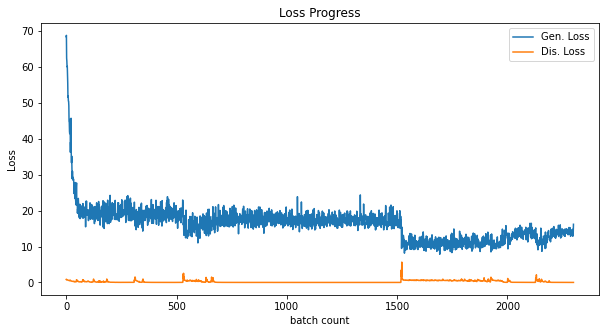

In [ ]:
# loss history
plt.figure(figsize=(10,5))
plt.title('Loss Progress')
plt.plot(loss_hist['gen'], label='Gen. Loss')
plt.plot(loss_hist['dis'], label='Dis. Loss')
plt.xlabel('batch count')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 가중치 저장
if target == 'grayscaled':
    torch.save(model_gen.state_dict(), grayscaled_model_gen_weight_file)
    torch.save(model_dis.state_dict(), grayscaled_model_dis_weight_file)
elif target == 'styled':
    torch.save(model_gen.state_dict(), styled_model_gen_weight_file)
    torch.save(model_dis.state_dict(), styled_model_dis_weight_file)

# 가짜 이미지 확인하기
---
- https://github.com/Seonghoon-Yu/AI_Paper_Review/blob/master/GAN/pix2pix(2016).ipynb

In [1]:
# 가중치 불러오기
if target == 'grayscaled':
    weights = torch.load(grayscaled_model_gen_weight_file)
elif target == 'styled':
    weights = torch.load(styled_model_gen_weight_file)
model_gen.load_state_dict(weights)

NameError: ignored

In [ ]:
# evaluation model
model_gen.eval()

# 가짜 이미지 생성
with torch.no_grad():
    for a,b in train_dl:
        fake_imgs = model_gen(a.to(device)).detach().cpu()
        real_imgs = b
        break

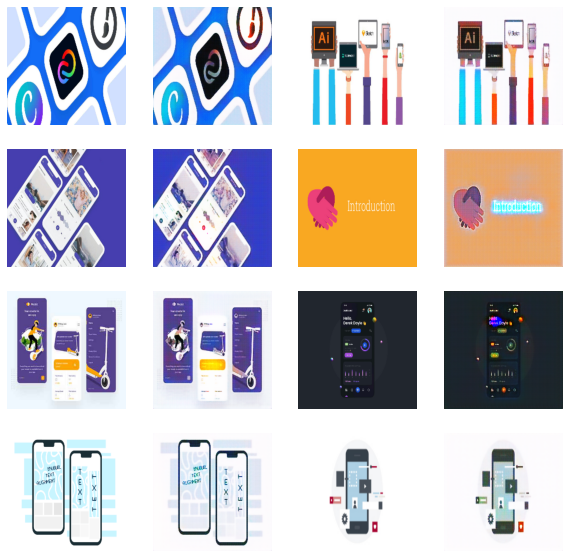

In [ ]:
# 가짜 이미지 시각화
plt.figure(figsize=(10,10))

for ii in range(0,16,2):
    plt.subplot(4,4,ii+1)
    plt.imshow(to_pil_image(0.5*real_imgs[ii]+0.5))
    plt.axis('off')
    plt.subplot(4,4,ii+2)
    plt.imshow(to_pil_image(0.5*fake_imgs[ii]+0.5))
    plt.axis('off')

# 깃허브 관련

취소 관련   
https://gmlwjd9405.github.io/2018/05/25/git-add-cancle.html

In [2]:
cd drive/MyDrive/Colab\ Notebooks/Github/IndividualProjcet-lofiToHifi

/content/drive/MyDrive/Colab Notebooks/Github/IndividualProjcet-lofiToHifi


In [3]:
!git config --global user.email "lightcloud98@gmail.com"
!git config --global user.name "ddophi98"

In [16]:
!git add MyData

In [4]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   LoFi_To_HiFi.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	MyData/


It took 3.56 seconds to enumerate untracked files. 'status -uno'
may speed it up, but you have to be careful not to forget to add
new files yourself (see 'git help status').
no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git commit -m "styled "

In [ ]:
!git log

In [ ]:
!git push -u origin main